# Final Project 
## Part I

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
full_df = pd.read_csv('https://query.data.world/s/5hjfxbix4nbqdumjr2tc7kizqenqca')
full_df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
12912,2020-04-20,Zimbabwe,0,0,25,3
12913,2020-04-21,Zimbabwe,0,0,25,3
12914,2020-04-22,Zimbabwe,3,0,28,3
12915,2020-04-23,Zimbabwe,0,0,28,3


## Dataset Descriptions
1. **Dataset Access:**   
The Coronoavirus (COVID-19) dataset records the number of confirmed cases and the number of deaths around the world, daily updated. It can be accessed and downloaded from data.world website(to be specific: https://data.world/markmarkoh/coronavirus-data). 
2. **License and Usage:**   
There are two contributors to this dataset, and it is shared with everyone, no more license info could be found. 
3. **Brief Info:** There are five files under above directory, here we read the full_data.csv, because that is the most complete one and contains the total number of cases or deaths. 
    * The file size is 280.41KB, pretty small, but since it is updated daily, I can extract more useful info from the incremental values in each file everyday. 
    * And there are 9613 rows and 6 columns: 
        1. date(datetime datatype), represents the date of cases confirmed or deaths recordered with standard format.
        2. location(string), the country name with alphabetical order.
        3. new_cases(integer number), the number of new confirmed cases from last day to the day the same row indicates.
        4. new_deaths(integer number), the number of new death from last day to the day the same row indicates.
        5. total_cases(int), the number of toal confirmed cases till the date the same row indicates.
        6. total_death(int), the number of toal death till the date the same row indicates.
    

In [4]:
full_df.shape

(9613, 6)

In [5]:
full_df.date.min(), full_df.date.max()

('2019-12-31', '2020-04-08')

In [6]:
full_df.location.nunique()

205

In [7]:
print('The range of the number of new cases: [{},{}]'.format(full_df.new_cases.min(),full_df.new_cases.max()))
print('The range of the number of new deaths: [{},{}]'.format(full_df.new_deaths.min(),full_df.new_deaths.max()))
print('The range of the number of total_cases: [{},{}]'.format(full_df.total_cases.min(),full_df.total_cases.max()))
print('The range of the number of total_deaths: [{},{}]'.format(full_df.total_deaths.min(),full_df.total_deaths.max()))

The range of the number of new cases: [-9,86713]
The range of the number of new deaths: [0,7412]
The range of the number of total_cases: [0,1391890]
The range of the number of total_deaths: [0,81478]


* From above range numbers, we can have an overview of the situation we are facing, however, there are some messay values we need to deal with before conducting the analysis,e.g. the negative number of new cases.

In [8]:
full_df[full_df['location'] == 'China']

,date,location,new_cases,new_deaths,total_cases,total_deaths
1781,2019-12-31,China,27,0,27,0
1782,2020-01-01,China,0,0,27,0
1783,2020-01-02,China,0,0,27,0
1784,2020-01-03,China,17,0,44,0
1785,2020-01-04,China,0,0,44,0
...,...,...,...,...,...,...
1876,2020-04-04,China,62,4,82527,3330
1877,2020-04-05,China,48,3,82575,3333
1878,2020-04-06,China,67,2,82642,3335
1879,2020-04-07,China,56,0,82698,3335


In [9]:
# plot the total number of confirmed cases in countries in 8th April, 2020.
full_df_today = full_df[full_df.date == '2020-04-08']
full_df_today = full_df_today[full_df_today.location != 'World'].sort_values(by=['total_cases'],ascending=False)
full_df_today

,date,location,new_cases,new_deaths,total_cases,total_deaths
9262,2020-04-08,United States,30613,1906,398809,12895
8188,2020-04-08,Spain,5478,743,140510,13798
4653,2020-04-08,Italy,3039,604,135586,17129
3395,2020-04-08,Germany,4003,254,103228,1861
1880,2020-04-08,China,86,2,82784,3337
...,...,...,...,...,...,...
272,2020-04-08,Anguilla,0,0,3,0
1205,2020-04-08,Bonaire Sint Eustatius and Saba,0,0,2,0
6916,2020-04-08,Papua New Guinea,1,0,2,0
8088,2020-04-08,South Sudan,0,0,1,0


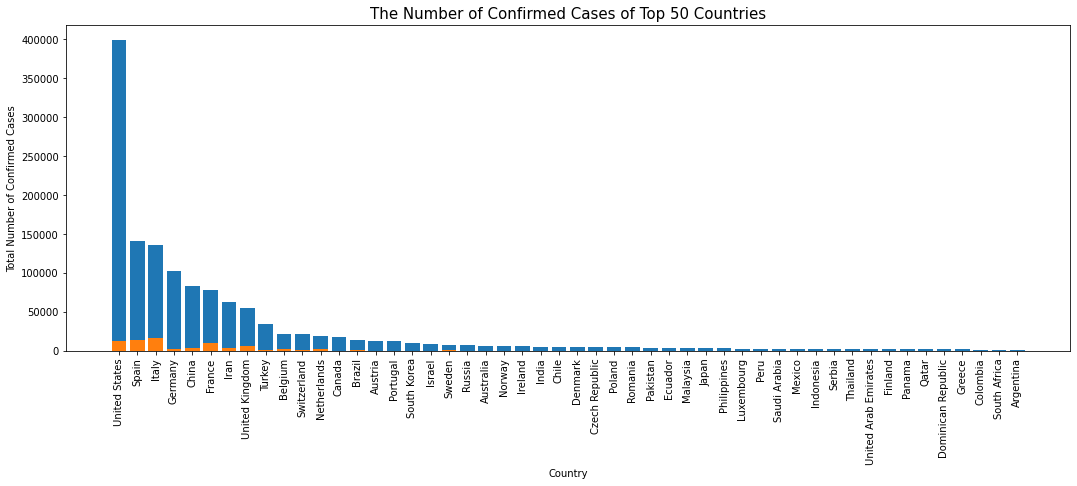

In [10]:
fig, ax = plt.subplots(figsize=(18,6))

ax.bar(full_df_today['location'][:50],full_df_today['total_cases'][:50]) # get top 50 countries' data
ax.set_title('The Number of Confirmed Cases of Top 50 Countries', fontsize=15)
ax.set_xlabel('Country')
ax.set_ylabel('Total Number of Confirmed Cases')
plt.xticks(rotation=90)

ax.bar(full_df_today['location'][:50],full_df_today['total_deaths'][:50])
plt.show()

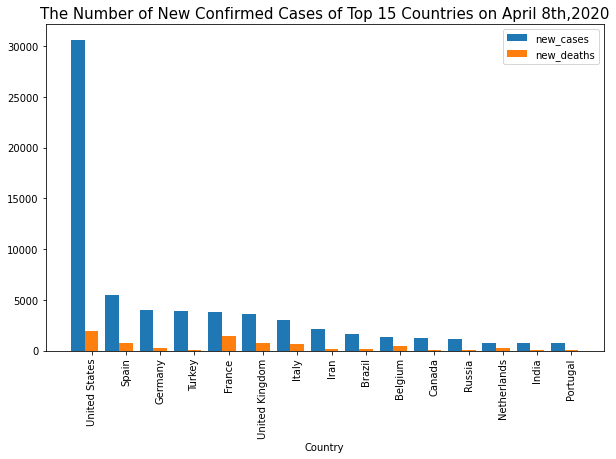

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

barWidth = 0.4
new_cases = temp['new_cases'][:15]
new_deaths = temp['new_deaths'][:15]
location = temp['location'][:15]
r1 = np.arange(len(new_cases))
r2 = [x + barWidth for x in r1]

ax.bar(r1, new_cases, width=barWidth, label='new_cases')
ax.bar(r2, new_deaths, width=barWidth, label='new_deaths')

ax.set_xlabel('Country')
plt.xticks([r + barWidth for r in range(len(new_cases))],location)
plt.xticks(rotation=90)
ax.set_title('The Number of New Confirmed Cases of Top 15 Countries on April 8th,2020',fontsize=15)

plt.legend()
plt.show()

In [27]:
world_df = full_df[full_df.location == 'World']
world_df

,date,location,new_cases,new_deaths,total_cases,total_deaths
9473,2019-12-31,World,27,0,27,0
9474,2020-01-01,World,0,0,27,0
9475,2020-01-02,World,0,0,27,0
9476,2020-01-03,World,17,0,44,0
9477,2020-01-04,World,0,0,44,0
...,...,...,...,...,...,...
9568,2020-04-04,World,81714,6586,1087651,58159
9569,2020-04-05,World,86713,6115,1174364,64274
9570,2020-04-06,World,71232,4655,1245596,68929
9571,2020-04-07,World,71392,5137,1316988,74066


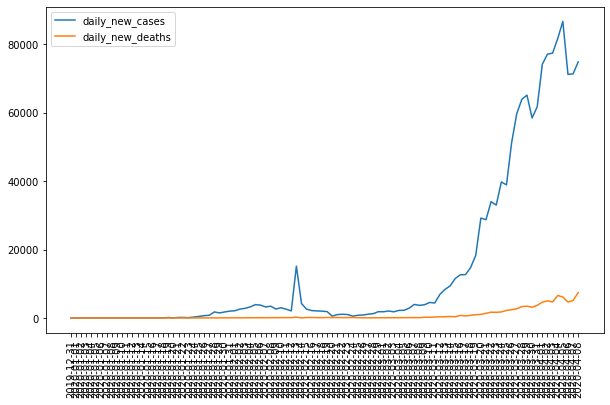

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(world_df['date'], world_df['new_cases'], label='daily_new_cases')
ax.plot(world_df['date'], world_df['new_deaths'], label='daily_new_deaths')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## Things that did and did not work
1. The bar plot uses two colors to represent the number of confirmed cases and deaths. In order to show them in the same time, I still need to explore another type of graph that performs better than simple bar plot. And since the number of United States is extremely large, so that the difference among other bars would not be so obvious.
2. I plot a trendlien of daily new cases and deaths as time goes by, and can see the fluctuation. However, the number of deaths are small compared to the number of confirmed cases, so I need to explore another way of plotting.
3. Since there are countries info, it would be more straight-forward to mark the Covid-19 cases on the map, so I still need to try to connect the map visualization with numbers. 
 
